In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import os 

# local files

#import CTfilter as CTfilter

1) Sur le site de XCOM, nous pouvons visualiser l'atténuation dans l'eau d'un rayon de 60 keV. En considérant un faisceau cohérent, l'atténuation pour un rayon de 60 kev est de 0,404 cm$^2$/g. En multipliant par la masse volumique de l'eau de 1 g/cm $^3$ , nous obtenons une valeur de 0,404 cm $^{-1}$. À 5 cm d'eau, il subsiste $0,404 \; \rm{cm^{-1}} \cdot 5 \; \rm{cm} =$. Similairement, à 20 cm, il subsiste $0,404 \; \rm{cm^{-1}} \cdot 20 \; \rm{cm} =$


2) 

In [7]:
## VARIABLES ###

### paramètres d'acquisition ###

## largeur d'un élément de détecteur (cm)
pixsize = 0.165

## taille du détecteur (nombre d'échantillons)
nbpixg = 336

### paramètres de reconstruction ###

## taille de la grille d'image (carrée)
nbvox = 192 # options: 96, 192

## taille du voxel (carré) (cm)
voxsize = 0.2 # option: 0.4, 0.2

## fichiers d'entrée
dataDir = "./TP4/"
anglesFile = "angles.txt"
sinogramFile = "sinogram-password.txt"
#sinogramFile = "sinogram-patient.txt"


In [42]:
def readAngles(filename):

    angles = np.loadtxt(filename)
    nbprj = angles.shape[0]

    # convertir en radians element par element
    angles = (np.pi/180.0)*angles

    return [nbprj, angles]


## lire un sinogramme
def readSinogram(filename):
    
    sinogram = np.loadtxt(filename)
    nbprj = sinogram.shape[0]
    nbpix = sinogram.shape[1]

    return [nbprj, nbpix, sinogram]


#enregistrer l'image
def saveImage(image, prefix):
    im = plt.imshow(image, cmap = cm.Greys_r)
    plt.colorbar()
    plt.title("method: "+prefix)
    plt.savefig(prefix+"-"+time.strftime("%Y%m%d-%H%M%S")+".png")


nbprj: 720
working on image column: 1/192


C:\Users\gaelm\AppData\Local\Temp\ipykernel_1176\3247394998.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  val_xsino = round(float(posi_prime[0]/pixsize))


working on image column: 2/192
working on image column: 3/192
working on image column: 4/192
working on image column: 5/192
working on image column: 6/192
working on image column: 7/192
working on image column: 8/192
working on image column: 9/192
working on image column: 10/192
working on image column: 11/192
working on image column: 12/192
working on image column: 13/192
working on image column: 14/192
working on image column: 15/192
working on image column: 16/192
working on image column: 17/192
working on image column: 18/192
working on image column: 19/192
working on image column: 20/192
working on image column: 21/192
working on image column: 22/192
working on image column: 23/192
working on image column: 24/192
working on image column: 25/192
working on image column: 26/192
working on image column: 27/192
working on image column: 28/192
working on image column: 29/192
working on image column: 30/192
working on image column: 31/192
working on image column: 32/192
working on image

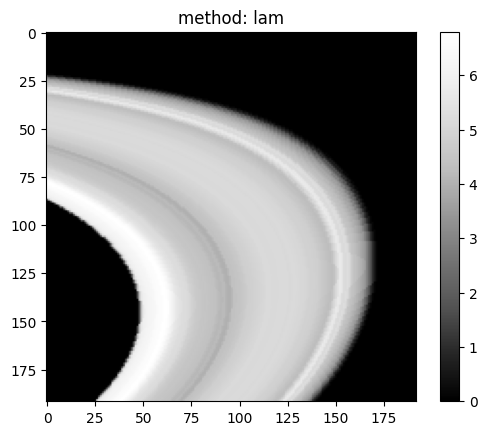

In [48]:
def readInput():
    # lire les angles
    angle_path= os.path.abspath("angles.txt")
    sino_path= os.path.abspath("sinogram-patient.txt")
    [nbprj, angles] = readAngles(angle_path)

    print("nbprj:",nbprj)


    # lire le sinogramme
    [nbprj2, nbpix2, sinogram] = readSinogram(sino_path)
    return [nbprj, angles, sinogram]


## reconstruire une image TDM en mode rétroprojection
def laminogram():
    
    [nbprj, angles, sinogram] = readInput()


    # initialiser une image reconstruite
    image = np.zeros((nbvox, nbvox))

    # "etaler" les projections sur l'image
    # ceci sera fait de façon "voxel-driven"
    # pour chaque voxel, trouver la contribution du signal reçu
    center_x = nbvox / 2
    center_y = nbvox / 2
    for j in range(nbvox): # colonnes de l'image
        print("working on image column: "+str(j+1)+"/"+str(nbvox))
        for i in range(nbvox): # lignes de l'image

            x = (j - center_x) * voxsize
            y = (center_y - i) * voxsize
            posi = np.array([[x],
                            [y]])

            for a in range(len(angles)):
                theta = angles[i]

                R = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])


                posi_prime = np.matmul(R, posi)

                val_xsino = round(float(posi_prime[0]/pixsize))
                image [i, j] = sinogram[a, round(336/2 + val_xsino)]

                                
                #votre code ici...
                #le défi est simplement géométrique;
                #pour chaque voxel, trouver la position par rapport au centre de la
                #grille de reconstruction et déterminer la position d'arrivée
                #sur le détecteur d'un rayon partant de ce point et atteignant
                #le détecteur avec un angle de 90 degrés. Vous pouvez utiliser
                #le pixel le plus proche ou interpoler linéairement...Rappel, le centre
                #du détecteur est toujours aligné avec le centre de la grille de
                #reconstruction peu importe l'angle.
                        
    saveImage(image, "lam")

laminogram()